Importing packages to be used:

In [75]:
# Import necessary libraries
import numpy as np
import pandas as pd
from openpyxl import load_workbook
from datetime import date
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import os # to work with local directory
import re
import plotly.express as px
import scipy.stats
from scipy.interpolate import interp1d
from itertools import islice
import seaborn as sb


<H1> Collection Of data </H1>

<h3> Importing Data </h3>

<h5> Deriving data from local files </h5>


In [76]:
# To convert openpyxl files to data frames
def toDataFrame(ws):
    data = ws.values
    cols = next(data)[1:]
    data = list(data)
    idx = [r[0] for r in data]
    data = (islice(r, 1, None) for r in data)
    return pd.DataFrame(data, index=idx, columns=cols)

In [77]:
wb_JHU_confirmed = load_workbook(r"OrigData\\time-series-covid19-confirmed-global.xlsx")  
ws_JHU_confirmed = wb_JHU_confirmed[wb_JHU_confirmed.sheetnames[0]]
df_JHU_confirmed = toDataFrame(ws_JHU_confirmed)

wb_JHU_fatality = load_workbook(r"OrigData\\time_series_covid19_deaths_global.xlsx")  
ws_JHU_fatality = wb_JHU_fatality[wb_JHU_fatality.sheetnames[0]]
df_JHU_fatality = toDataFrame(ws_JHU_fatality)

wb_covid_data = load_workbook(r"OrigData\\owid-covid-data.xlsx")
ws_covid_data = wb_covid_data[wb_covid_data.sheetnames[0]]
df_covid_data = toDataFrame(ws_covid_data)

wb_age_data = load_workbook(r"OrigData\\statistic_id1110522_number-of-covid-19-cases-india-2020-by-age-group.xlsx")  # Work Book
ws_age_data = wb_age_data[wb_age_data.sheetnames[1]]
df_age_data = pd.DataFrame(ws_age_data.values)

wb_altitude = load_workbook(r"OrigData\\DA data altitude.xlsx")
ws_altitude = wb_altitude[wb_altitude.sheetnames[0]]
df_altitude = toDataFrame(ws_altitude)

wb_economy = load_workbook(r"OrigData\\GDP20192020.xlsx")  # Work Book
ws_economy = wb_economy[wb_economy.sheetnames[0]]
df_economy = toDataFrame(ws_economy)

wb_economy_IND = load_workbook(r"OrigData\\IND_eco.xlsx")
ws_economy_IND = wb_economy_IND[wb_economy_IND.sheetnames[0]]
df_economy_IND = toDataFrame(ws_economy_IND)

<h3> Assessing the Imported Data Visually</h3>

In [78]:
df_JHU_fatality.sample(n=5)

Country/Region      Lat      Long  1/22/20  \
NaN              Saint Vincent and the Grenadines  12.9843  -61.2872        0   
South Australia                         Australia -34.9285  138.6007        0   
NaN                                      Pakistan  30.3753   69.3451        0   
Guizhou                                     China  26.8154  106.8748        0   
NaN                                       Denmark  56.2639    9.5018        0   

                 1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  ...  \
NaN                    0        0        0        0        0        0  ...   
South Australia        0        0        0        0        0        0  ...   
NaN                    0        0        0        0        0        0  ...   
Guizhou                0        0        0        0        0        0  ...   
NaN                    0        0        0        0        0        0  ...   

                 11/21/20  11/22/20  11/23/20  11/24/20  11/25/20  11/26/20  \
NaN                     0         0         0         0         0         0   
South Australia         4         4         4         4         4         4   
NaN                  7662      7696      7744      7803      7843      7897   
Guizhou                 2         2         2         2         2         2   
NaN                   781       784       789       797       802       811   

                 11/27/20  11/28/20  11/29/20  11/30/20  
NaN                     0         0         0         0  
South Australia         4         4         4         4  
NaN                  7942      7985      8025      8091  
Guizhou                 2         2         2         2  
NaN                   816       823       829       837  

[5 rows x 317 columns]

In [79]:
df_JHU_confirmed.head(n=5)

Country/Region       Lat       Long  1/22/20  1/23/20  1/24/20  1/25/20  \
NaN    Afghanistan  33.93911  67.709953        0        0        0        0   
NaN        Albania  41.15330  20.168300        0        0        0        0   
NaN        Algeria  28.03390   1.659600        0        0        0        0   
NaN        Andorra  42.50630   1.521800        0        0        0        0   
NaN         Angola -11.20270  17.873900        0        0        0        0   

     1/26/20  1/27/20  1/28/20  ...  11/21/20  11/22/20  11/23/20  11/24/20  \
NaN        0        0        0  ...     44503     44706     44988     45280   
NaN        0        0        0  ...     32196     32761     33556     34300   
NaN        0        0        0  ...     73774     74862     75867     77000   
NaN        0        0        0  ...      6207      6256      6304      6351   
NaN        0        0        0  ...     14413     14493     14634     14742   

     11/25/20  11/26/20  11/27/20  11/28/20  11/29/20  11/30/20  
NaN     45490     45716     45839     45966     46215     46498  
NaN     34944     35600     36245     36790     37625     38182  
NaN     78025     79110     80168     81212     82221     83199  
NaN      6428      6534      6610      6610      6712      6745  
NaN     14821     14920     15008     15087     15103     15139  

[5 rows x 317 columns]

In [81]:
df_country_cases = df_JHU_confirmed[['Country/Region','Lat','Long','11/30/20']]
df_country_cases.sample(5)

Country/Region      Lat     Long  11/30/20
NaN              Namibia -22.9576  18.4904     14380
NaN         South Africa -30.5595  22.9375    790004
St Martin         France  18.0708 -63.0501       717
NaN             Colombia   4.5709 -74.2973   1316806
NaN          Netherlands  52.1326   5.2913    523478

In [7]:
# df_selectedCountries = df_country_cases.loc[df_country_cases["Country/Region"].isin(["India", "US", "Japan","Sweden","France"])]
# df_selectedCountries

In [82]:
df_covid_data.head(n=5)

continent     location        date  total_cases  new_cases  \
AFG      Asia  Afghanistan  2020-01-23          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-24          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-25          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-26          NaN        0.0   
AFG      Asia  Afghanistan  2020-01-27          NaN        0.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   
AFG                 NaN           NaN         0.0                  NaN   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   
AFG                      NaN  ...        1803.987              NaN   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   
AFG                597.029                 9.59             NaN           NaN   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   
AFG                  37.746                         0.5            64.83   

     human_development_index  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  
AFG                    0.498  

[5 rows x 49 columns]

In [83]:
df_age_data.iloc[[5,6, 7, 8,9,10], [1, 2]]

1     2
5   Less than 14 years   0.5
6          15-29 years   2.5
7          30-44 years  11.4
8          45-59 years  35.1
9          60-74 years  40.2
10  More than 75 years  10.3

In [84]:
df_altitude.head(5)

Fatality ratio  No of cases            Altitude          NaN  \
Afghanistan          0.0383       1737.0  1,885 m (6,184 ft)  Afghanistan   
Algeria              0.0297       2352.0    800 m (2,625 ft)      Algeria   
Angola               0.0229        340.0  1,112 m (3,648 ft)       Angola   
Argentina            0.0271      37941.0    595 m (1,952 ft)    Argentina   
Australia            0.0325        907.0    330 m (1,083 ft)    Australia   

             population density   NaN  
Afghanistan                49.0  None  
Algeria                    18.0  None  
Angola                     23.0  None  
Argentina                  16.0  None  
Australia                   3.0  None

In [85]:
df_economy_IND.head(5)

INFLATION RATE INDIA INFRASTRUCTURE OUTPUT LENDING RATES  \
2019-11-01           5.54                         0.7           9.4   
2019-12-01           7.35                         3.1           9.4   
2020-01-01           7.59                         2.2           9.4   
2020-02-01           6.58                         6.4           9.4   
2020-03-01           5.84                        -8.6           9.4   

           REPO RATES GOVERNMENT REVENUES  CONSUMER SPENDING   NaN  QUARTER  \
2019-11-01        4.9              10122.2             19119  None  2018 Q1   
2019-12-01        4.9              11779.2           19841.8  None   2018Q2   
2020-01-01        4.9              12828.6           18890.1  None  2018 Q3   
2020-02-01        4.9              14288.7           19038.5  None  2018 Q4   
2020-03-01          4              17507.3           20464.2  None  2019 Q1   

           Business Expectations Index (BEI)  
2019-11-01                               115  
2019-12-01                             115.8  
2020-01-01                             114.6  
2020-02-01                             114.1  
2020-03-01                               115

<h3> Organising the Imported Data via Program </h3>

In [86]:
# List of countries available in JHU and OWID data sets
print("countries available in John Hopkins Dataset :")
df_JHU_confirmed['Country/Region'].unique()


countries available in John Hopkins Dataset :


array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guin

In [87]:
print("countries available in OWID :")
df_covid_data['location'].unique()


countries available in OWID :


array(['Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bolivia', 'Brazil', 'Barbados', 'Brunei',
       'Bhutan', 'Botswana', 'Central African Republic', 'Canada',
       'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon',
       'Democratic Republic of Congo', 'Congo', 'Colombia', 'Comoros',
       'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
       'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic',
       'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Western Sahara',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Guinea', 'Gambia',
       'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 

In [88]:
letters = "a b c d e f g h i j k l m n o p q r s t u v w x y z".upper().split()
alphas = []
for i in letters:
    alphas.append(i)
for i in letters:
    for j in letters:
        k = (i+j)
        
    
        alphas.append(k)
        if k == 'LF':
            break
    if i == 'L':
        break
alphas = alphas[4:]        


Collecting total cases in world using JHU data:

In [89]:

totalCasesInWorldJHU = []
dateTotalCasesInWorldJHU = []
for X in alphas:
    column = ws_JHU_confirmed[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalCasesInWorldJHU.append(column[0].value)
    else: 
        dateTotalCasesInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalCasesInWorldJHU.append(Sum)

Collecting total deaths in world using JHU data:

In [90]:
totalDeathsInWorldJHU = []
dateTotalDeathsInWorldJHU = []
for X in alphas:
    column = ws_JHU_fatality[X]
    Sum = 0
    for i in range(1,272):
        Sum+=column[i].value
    if isinstance(column[0].value, str): 
        dateTotalDeathsInWorldJHU.append(column[0].value)
    else: 
        dateTotalDeathsInWorldJHU.append(column[0].value.strftime('%d/%m/%Y'))
    totalDeathsInWorldJHU.append(Sum)


Storing all data from OWID into a dictionary

In [91]:
dataCol = "a b c d e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    for x in range(1,len(column)):
          sample.append(column[x].value)
    dataOWID[column[0].value] = sample  
def dailyKeyReturnerUsingLoc(code,key):
    loc = dataOWID['location']
    date = dataOWID['date']
    total_cases = dataOWID[key]
    total_cases_IND = []
    date_IND = []    
    for x in range(len(loc)):
        if loc[x] == code:
            total_cases_IND.append(total_cases[x])
            date_IND.append(date[x])
    return [date_IND,total_cases_IND]
# print(dataOWID['date'])    

In [92]:
dataCol = "b c d e f g".upper().split(" ")
dataEconInd = {}
for X in dataCol:
    column = ws_economy_IND[X]
    sample = []
    for x in range(3,13):
          sample.append(column[x].value)
    dataEconInd[column[0].value] = sample  
# dataEconInd
def economyGetter(key):
    return dataEconInd[key]

In [93]:
dataCol = "a b c e f g h i j k l m n o p q r s t u v w x y z aa ab ac ad ae af ag ah ai aj ak al am an ao ap aq ar as at au av aw ax".upper().split(" ")
dataOWID_today = {}
for X in dataCol:
    column = ws_covid_data[X]
    sample = []
    dates = ws_covid_data['D']
    for x in range(1,len(column)):
          if dates[x].value == '2020-11-29':  
              sample.append(column[x].value)
    dataOWID_today[column[0].value] = sample  
# dataOWID_today['location']



In [94]:
df_cases_today = pd.DataFrame.from_dict(dataOWID_today)
df_cases_today.sample(n=5)

iso_code      continent               location  total_cases  new_cases  \
145      SAU           Asia           Saudi Arabia       357128        217   
156      STP         Africa  Sao Tome and Principe          989          0   
65       GMB         Africa                 Gambia         3734          3   
48       DOM  North America     Dominican Republic       143473        820   
152      SMR         Europe             San Marino         1586          0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
145             267.143        5884.0          14               14.857   
156               1.429          17.0           0                0.000   
65                1.143         123.0           0                0.000   
48              723.286        2330.0           2                2.857   
152              27.286          45.0           0                0.286   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
145                10258.211  ...       49045.411              NaN   
156                 4512.664  ...        3052.714             32.3   
65                  1545.105  ...        1561.767             10.1   
48                 13225.873  ...       14600.861              1.6   
152                46732.277  ...       56861.470              NaN   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers male_smokers  \
145                259.538                17.72             1.8         25.4   
156                270.113                 2.42             NaN          NaN   
65                 331.430                 1.91             0.7         31.2   
48                 266.653                 8.20             8.5         19.1   
152                    NaN                 5.64             NaN          NaN   

    handwashing_facilities hospital_beds_per_thousand life_expectancy  \
145                    NaN                        2.7           75.13   
156                 41.340                        2.9           70.39   
65                   7.876                        1.1           62.05   
48                  55.182                        1.6           74.08   
152                    NaN                        3.8           84.97   

    human_development_index  
145                   0.853  
156                   0.589  
65                    0.460  
48                    0.736  
152                     NaN  

[5 rows x 49 columns]

In [151]:
df_cases_selected_countries = df_cases_today.query('location in ["India","Italy","United States","Japan"]')
df_cases_selected_countries

iso_code      continent       location  total_cases  new_cases  \
77       IND           Asia          India      9431691      38772   
83       ITA         Europe          Italy      1585178      20646   
86       JPN           Asia          Japan       147515       2058   
177      USA  North America  United States     13383320     138903   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
77            41689.429      137139.0         443              485.857   
83            25187.143       54904.0         541              725.857   
86             2068.714        2057.0          15               16.286   
177          162364.857      266873.0         826             1429.571   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
77                  6834.537  ...        6426.674             21.2   
83                 26217.831  ...       35220.084              2.0   
86                  1166.344  ...       39002.223              NaN   
177                40432.668  ...       54225.446              1.2   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers male_smokers  \
77                 282.280                10.39             1.9         20.6   
83                 113.151                 4.78            19.8         27.8   
86                  79.370                 5.72            11.2         33.7   
177                151.089                10.79            19.1         24.6   

    handwashing_facilities hospital_beds_per_thousand life_expectancy  \
77                   59.55                       0.53           69.66   
83                     NaN                       3.18           83.51   
86                     NaN                      13.05           84.63   
177                    NaN                       2.77           78.86   

    human_development_index  
77                    0.640  
83                    0.880  
86                    0.909  
177                   0.924  

[4 rows x 49 columns]

In [95]:
disease_list =  ['cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence','total_deaths_per_million']
df_disease = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','cardiovasc_death_rate','female_smokers','male_smokers','diabetes_prevalence']
df_disease[colsList].sample(n=5)

location  total_deaths_per_million  cardiovasc_death_rate  \
16    Bulgaria                   548.900                424.688   
45    Djibouti                    61.741                258.037   
115    Myanmar                    35.251                202.104   
29      Canada                   319.166                105.599   
148  Singapore                     4.957                 92.243   

     female_smokers  male_smokers  diabetes_prevalence  
16             30.1          44.4                 5.81  
45              1.7          24.5                 6.05  
115             6.3          35.2                 4.61  
29             12.0          16.6                 7.37  
148             5.2          28.3                10.99

In [96]:
ageGroupList = ['total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData = df_cases_today.dropna(subset=ageGroupList)
colsList = ['location','total_cases_per_million','aged_70_older','aged_65_older','median_age']
df_ageGroupData[colsList].sample(n=5)

location  total_cases_per_million  aged_70_older  \
104               Latvia                 8999.566         14.136   
81               Iceland                15768.498          9.207   
169  Trinidad and Tobago                 4758.873          5.819   
100            Sri Lanka                 1096.704          5.331   
134                 Peru                29192.481          4.455   

     aged_65_older  median_age  
104         19.754        43.9  
81          14.431        37.3  
169         10.014        36.2  
100         10.069        34.1  
134          7.151        29.1

In [137]:
altitudeList = ['Altitude','Fatality ratio','No of cases']
alt = df_altitude['Altitude']
df_altitude_modif = df_altitude.copy()
for i in range(len(alt)):
    temp = alt[i]
    temp = temp.split('m')
    temp = temp[0]
    temp = float(temp.replace(',','').replace(' ',''))
    df_altitude_modif.iloc[i, df_altitude_modif.columns.get_loc('Altitude')] = temp
df_altitude_modif.sample(n=5)

Fatality ratio  No of cases Altitude                 NaN  \
Madagascar                  0.0145        251.0      442          Madagascar   
Chile                       0.0279      15235.0     1870               Chile   
Dominican Republic          0.0164       2317.0      424  Dominican Republic   
Philippines                 0.0194       8242.0      442         Philippines   
Chad                        0.0608        101.0      543                Chad   

                    population density   NaN  
Madagascar                        44.0  None  
Chile                             23.0  None  
Dominican Republic               216.0  None  
Philippines                      365.0  None  
Chad                              12.0  None

In [111]:
economy_list =  ['gdp_per_capita','human_development_index','extreme_poverty','total_deaths_per_million','total_cases_per_million']
df_economy = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','gdp_per_capita','extreme_poverty','human_development_index','total_cases_per_million']
df_disease[colsList].sample(n=5)

location  total_deaths_per_million  gdp_per_capita  \
68               Greece                   222.679       24574.382   
160              Sweden                   661.533       46949.283   
176             Uruguay                    21.879       20551.409   
82               Israel                   330.886       33132.320   
48   Dominican Republic                   214.788       14600.861   

     extreme_poverty  human_development_index  total_cases_per_million  
68               1.5                    0.870                 9999.658  
160              0.5                    0.933                24073.918  
176              0.1                    0.804                 1645.495  
82               0.5                    0.903                38772.620  
48               1.6                    0.736                13225.873

In [116]:
medical_list =  ['life_expectancy','handwashing_facilities','hospital_beds_per_thousand','total_deaths_per_million','total_cases_per_million']
df_medical = df_cases_today.dropna(subset=disease_list)
colsList = ['location','total_deaths_per_million','life_expectancy','handwashing_facilities','hospital_beds_per_thousand','total_cases_per_million']
df_medical[colsList].sample(n=5)

location  total_deaths_per_million  life_expectancy  \
37       Colombia                   718.984            77.29   
145  Saudi Arabia                   169.013            75.13   
129         Nepal                    50.761            70.78   
133        Panama                   709.192            78.51   
10     Azerbaijan                   134.232            73.00   

     handwashing_facilities  hospital_beds_per_thousand  \
37                   65.386                        1.71   
145                     NaN                        2.70   
129                  47.782                        0.30   
133                     NaN                        2.30   
10                   83.241                        4.70   

     total_cases_per_million  
37                 25713.480  
145                10258.211  
129                 7961.682  
133                38177.951  
10                 11657.260

<h3> Assessing Data Consistency for JHU and OWID </h3>

Taking total cases world wide using OWID data:

Regression line: y=0.00+1.00x, r=1.00


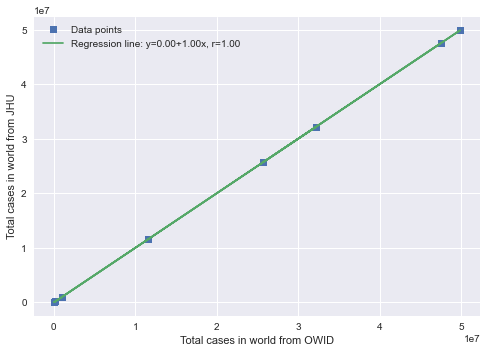

In [33]:
data = dailyKeyReturnerUsingLoc('World','total_cases')
x = []
for i in range(10):
    x.append(np.random.randint(313)-1)    
data_JHU = []
data_OWID = []
for i in x:
    data_OWID.append(data[1][i])
    data_JHU.append(totalCasesInWorldJHU[i])
    
plt.style.use('seaborn')
slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
print(line)
fig, ax = plt.subplots()
ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
temp = []
for x in data_OWID:
    temp.append(slope*x)
ax.plot(data_OWID, intercept + temp, label=line)
ax.set_xlabel('Total cases in world from OWID')
ax.set_ylabel('Total cases in world from JHU')
ax.legend(facecolor='white')
plt.show()

<h1>Introduction</h1>

list of plots:
INTRODUCTION
1. total cases, deaths in world := separate line plots
2. Heat map of cases in world := country wise current case
3. total cases,deaths in India
4. Correlation between cases of India and World
5. Correlation between deaths of India and World
HYPOTHESIS
1. New cases per million in India and USA := two line plots, box plots
2. New cases per million in India and USA := "Correlation/regression"
3. Age groups number of covid cases in different age groups := pie chart
4. Age groups grid := total cases/mil , age 65 older, age 70 older, median age
5. diseases grid := disease_list = 'cardiovasc', 'female_smokers', 'male_smokers', 'diabetes_prevalence', 'totaldeaths/mil'
6. altitude grid := altitude, cases/mil, deaths/mil
7. economy grid := cases/mil , gdp , human_development_index,  extreme_poverty
8. Hospital facilities grid := deaths/mil , cases/mil, life_expectancy, handwashing_facilities, hospital_beds_per_thousand
9. Indian Economy grid := cases month wise ,  GOVERNMENT REVENUES, INFLATION RATE	
10. India vs USA GDP comaprision := bar graph
Interpretation:
11. Female smokers, age 70 older, deaths := scatter heat map

Utility functions for plotting used :

In [34]:
def dayWisePlotter(x,y,figsize,xlabel,ylabel,title,MaxNLocator,xticklabels,rotation):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.xaxis.set_major_locator(plt.MaxNLocator(MaxNLocator))
    fig = ax.figure
    ax.figure.canvas.draw()
    ax.yaxis.set_major_formatter('{x:0.0f}')
    ax.set_xticklabels(xticklabels)                
    fig.autofmt_xdate(rotation=rotation)
    ax.plot(x,y)
    plt.show()

def monthWisePlotter(x,y,figsize,xlabel,ylabel,title):
    plt.figure(figsize=figsize)
    ax = plt.axes(xlabel=xlabel,ylabel=ylabel,title=title)
    ax.plot(x,y)
    plt.show()


    

utility functions for interpretation:

In [35]:
def correlationChecker(data_OWID,data_JHU,owid,jhu):
    slope, intercept, r, p, stderr = scipy.stats.linregress(data_OWID, data_JHU )
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    print(line)
    fig, ax = plt.subplots()
    ax.plot(data_OWID, data_JHU, linewidth=0, marker='s', label='Data points')
    temp = []
    for x in data_OWID:
        temp.append(slope*x)
    ax.plot(data_OWID, intercept + temp, label=line)
    ax.set_xlabel(owid)
    ax.set_ylabel(jhu)
    ax.legend(facecolor='white')
    plt.show()



<h2> Total cases worldwide </h2>

<ipython-input-34-8077a346ca64>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


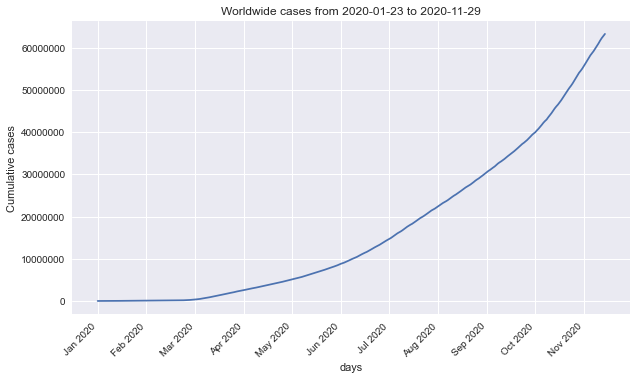

In [36]:
xticklabels=["","Jan 2020","Feb 2020","Mar 2020","Apr 2020","May 2020","Jun 2020","Jul 2020","Aug 2020","Sep 2020","Oct 2020","Nov 2020"]   
dayWisePlotter(dateTotalCasesInWorldJHU,totalCasesInWorldJHU,[10,6],"days","Cumulative cases","Worldwide cases from 2020-01-23 to 2020-11-29",12,xticklabels,45)


<h2> Total Deaths World Wide </h2>

<ipython-input-34-8077a346ca64>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


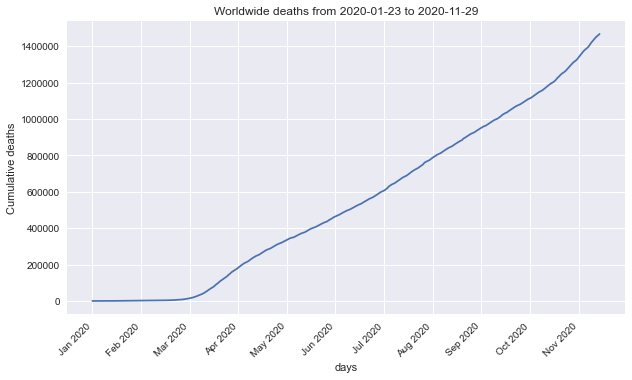

In [37]:
dayWisePlotter(dateTotalDeathsInWorldJHU,totalDeathsInWorldJHU,[10,6],"days","Cumulative deaths","Worldwide deaths from 2020-01-23 to 2020-11-29",12,xticklabels,45)

Let us look for the correlation between the cases and deaths.

<P>
from the above correlation coefficient=0.97<br>
which means the there is a strong correlation and between total cases and total deaths. <br>
 From above graph we can say that country which reported higher number of cases will also report high number of deaths due to covid
    </P>

<h2> Heat Map for cases </h2>

In [38]:

circle_radius = 10
typeLists = ['stamen-watercolor']
for i in typeLists:
    fig = px.density_mapbox(df_country_cases, lat='Lat', lon='Long', radius=circle_radius, zoom=0, mapbox_style=i)
    fig.show()


<h2> Total cases and Deaths in India </h2>

<ipython-input-34-8077a346ca64>:8: UserWarning:

FixedFormatter should only be used together with FixedLocator



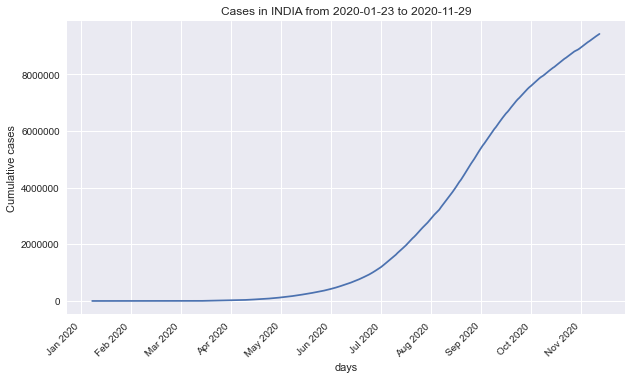

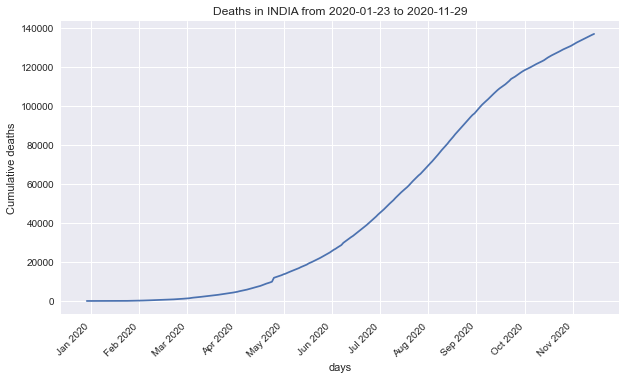

In [39]:
dataCasesIND = dailyKeyReturnerUsingLoc('India','total_cases')
dataCasesIND_month = []
for i in range(len(dataCasesIND[0])):
    test = dataCasesIND[0][i]
    test = test[len(test)-2:]
#     print(test)
    p = re.compile('01$')
    if p.match(test):
        dataCasesIND_month.append(dataCasesIND[1][i])
# print(dataCasesIND_month)
dataDeathsIND = dailyKeyReturnerUsingLoc('India','total_deaths')
dayWisePlotter(dataCasesIND[0],dataCasesIND[1],[10,6],"days","Cumulative cases","Cases in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)
dayWisePlotter(dataDeathsIND[0],dataDeathsIND[1],[10,6],"days","Cumulative deaths","Deaths in INDIA from 2020-01-23 to 2020-11-29",12,xticklabels,45)


Let us check the correlation of cases and deaths in India as compared to those in the world

Regression line: y=3487199.83+5.40x, r=0.98


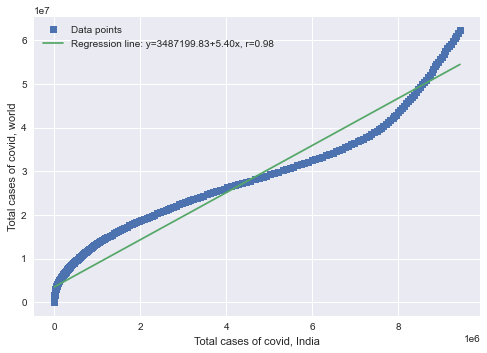

Regression line: y=247965.70+8.25x, r=0.97


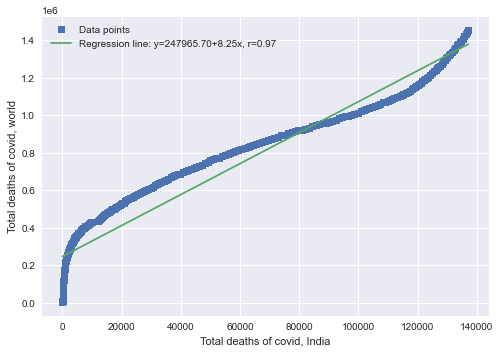

In [40]:
casesInIND = []
casesInWorld = []
for i in range(len(dataCasesIND[1])):
    if dataCasesIND[1][i]!= None and totalCasesInWorldJHU[i]!= None:
        casesInIND.append(dataCasesIND[1][i])
        casesInWorld.append(totalCasesInWorldJHU[i])
deathsInIND = []
deathsInWorld = []
for i in range(len(dataDeathsIND[1])):
    if dataDeathsIND[1][i]!= None and totalDeathsInWorldJHU[i]!= None:
        deathsInIND.append(dataDeathsIND[1][i])
        deathsInWorld.append(totalDeathsInWorldJHU[i])
    
        
        
correlationChecker(casesInIND,casesInWorld,"Total cases of covid, India","Total cases of covid, world")   
correlationChecker(deathsInIND,deathsInWorld,"Total deaths of covid, India","Total deaths of covid, world")    

<p>
For both the plots correlation coefficient is almost same 0.98<br>
which tells us that as cases and deaths in India are increasing simultaneously does cases and deaths in world.But there is some 
difference in the rate<br>
As cases increase by 1 unit in india world cases increase by 5.40 units and as deaths increase by 1 unit in India world deaths 
increase by 8.25<br>
which indiacates that mortality 
</p>



<H1> Hypothesis </H1>

<h2> Cases Across Different Countries :</h2>

<ipython-input-41-d2c4284355a5>:9: UserWarning:

FixedFormatter should only be used together with FixedLocator



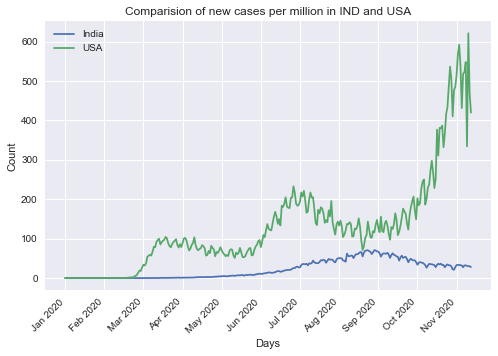

In [41]:

dataCasesDailyIND = dailyKeyReturnerUsingLoc('India','new_cases_per_million')    
dataCasesDailyUSA = dailyKeyReturnerUsingLoc('United States','new_cases_per_million')    
plt.figure()
ax = plt.axes(xlabel="Days",ylabel="Count",title="Comparision of new cases per million in IND and USA")
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
fig = ax.figure
ax.figure.canvas.draw()
ax.yaxis.set_major_formatter('{x:0.0f}')
ax.set_xticklabels(xticklabels)                
fig.autofmt_xdate(rotation=45)
ax.plot(dataCasesDailyIND[0],dataCasesDailyIND[1],label="India")
ax.plot(dataCasesDailyUSA[0],dataCasesDailyUSA[1],label="USA")
plt.legend()
plt.show()

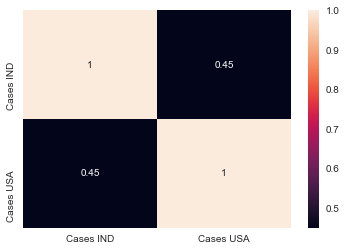

In [150]:
dateCPM = []
newCPMIND = [0]
newCPMUSA = [0]
for i in range(len(dataCasesDailyIND[0])):
    if dataCasesDailyUSA[1][:-1][i]!=None and dataCasesDailyIND[1][i]!= None:
        dateCPM.append(dataCasesDailyIND[0])
        newCPMUSA.append(dataCasesDailyUSA[1][:-1][i])
        newCPMIND.append(dataCasesDailyIND[1][i])


array = np.array([newCPMIND,newCPMUSA])
index_values = dateCPM
column_values = ['Cases IND','Cases USA']
df_small = pd.DataFrame(data = array,  
                  index = column_values,  
                  columns = index_values) 
df = df_small.T
df.astype(float)
correlation_mat = df.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<P>
Hypothesis test: <br>
H0= per day cases in India is same as per day cases in America<br> 
H1=per day cases in India is different from per day cases in America<br>
</P>


Regression line: y=56.77+3.76x, r=0.57


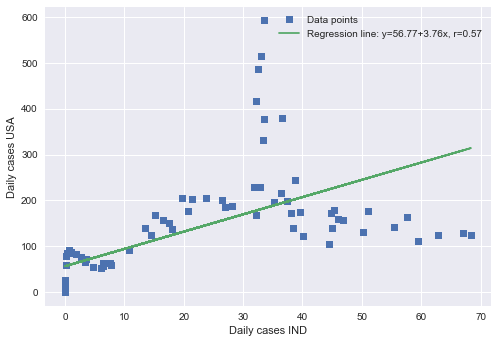

(0.5743830207317764, 4.148917360197614e-10)

In [44]:
slope, intercept, r, p, stderr = scipy.stats.linregress(dataCasesDailyIND[1], dataCasesDailyUSA[1][1:])
sample_corr_IND = []
sample_corr_USA = []
for i in range(100):
    x = np.random.randint(len(dataCasesDailyIND[1])-1)
    sample_corr_IND.append(dataCasesDailyIND[1][x])
    sample_corr_USA.append(dataCasesDailyUSA[1][1:][x])
correlationChecker(sample_corr_IND,sample_corr_USA,"Daily cases IND","Daily cases USA")   
result = scipy.stats.pearsonr(sample_corr_IND, sample_corr_USA)
result

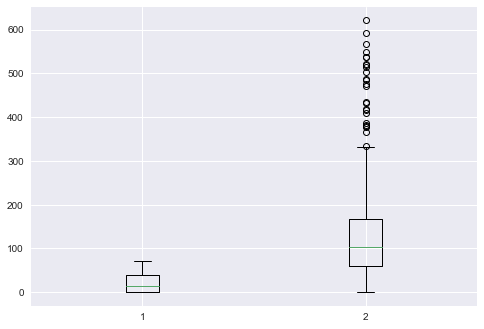

In [45]:
data=[dataCasesDailyIND[1],dataCasesDailyUSA[1][1:]]
plt.boxplot(data)
plt.show()


<h4> Country wise total cases (Italy,India,US,Japan) </h4>

Text(0.5, 1.0, 'Total cases in different countries as of 30th Nov 2020')

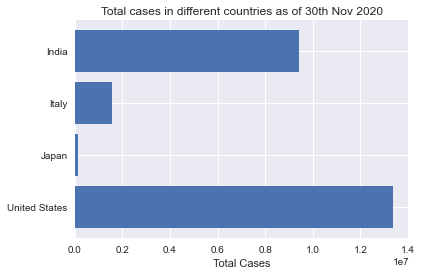

In [159]:
fig, ax = plt.subplots()
y_pos = np.arange(len(df_cases_selected_countries["location"]))
ax.barh(y_pos, df_cases_selected_countries["total_cases"])
ax.set_yticks(y_pos)
ax.set_yticklabels(df_cases_selected_countries["location"])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Total Cases')
ax.set_title('Total cases in different countries as of 30th Nov 2020')

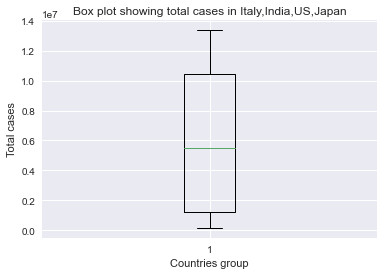

In [154]:
plt.xlabel("Countries group")
plt.ylabel("Total cases")
plt.title("Box plot showing total cases in Italy,India,US,Japan")
plt.boxplot(df_cases_selected_countries["total_cases"])
plt.show()

<h2> Age Groups </h2>

<P>
Hypothesis test:<br>
H0: Number of cases are same across all age groups in India<br>
H1: There is some difference in number of cases across the age groups <br>
</P>

([<matplotlib.patches.Wedge at 0x20e6c795130>,
 [Text(1.099864295735893, 0.017278048656840017, 'Less than 14 years'),
  Text(1.0933570509441903, 0.12070774271198717, '15-29 years'),
  Text(0.9397051872092018, 0.5717990566030334, '30-44 years'),
  Text(-0.4652279531565006, 0.9967762796143441, '45-59 years'),
  Text(-0.36610163557183434, -1.0372895412716876, '60-74 years'),
  Text(1.042912059127538, -0.34976340135348516, 'More than 75 years')])

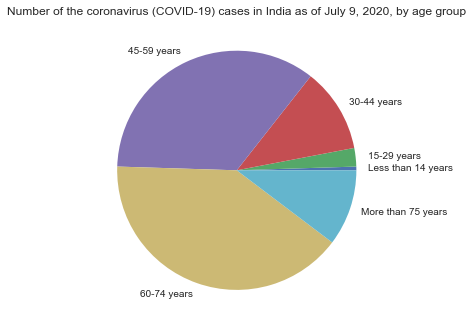

In [46]:

ageGroup = []
percentage = []

colAge = ws_age_data['B']
colPer = ws_age_data['C']
for x in range(5,11):
    ageGroup.append(colAge[x].value)
    percentage.append(colPer[x].value)
plt.title("Number of the coronavirus (COVID-19) cases in India as of July 9, 2020, by age group")
plt.pie(percentage, labels = ageGroup) 
    



 <p> Pair wise regression plots of cases per million, proportion of population more than 70 years old, proportion of population more than 65 years old and the median age across 50 countries randomly selected from the data set </p>

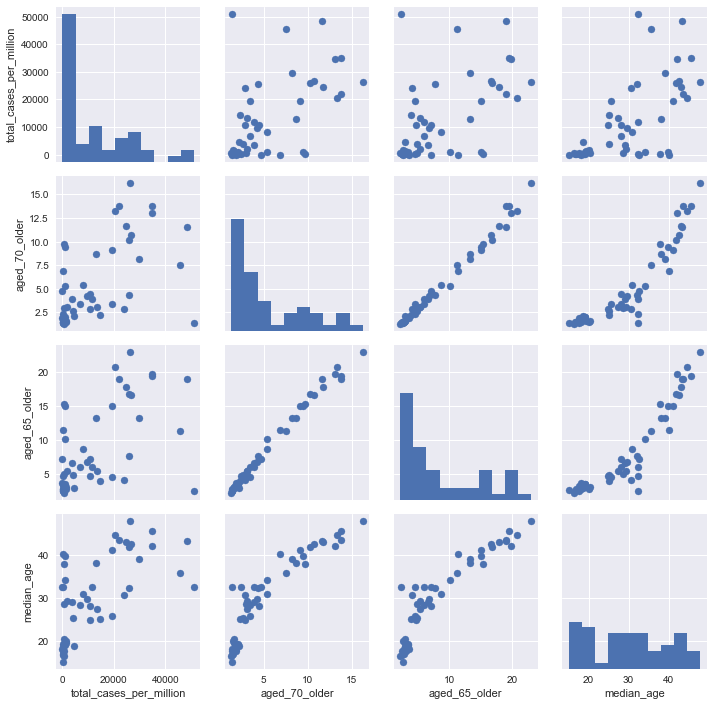

In [78]:
g=sb.PairGrid(data=df_ageGroupData.sample(n=50), vars=ageGroupList)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

Correlation matrix as a heat map of the above plots

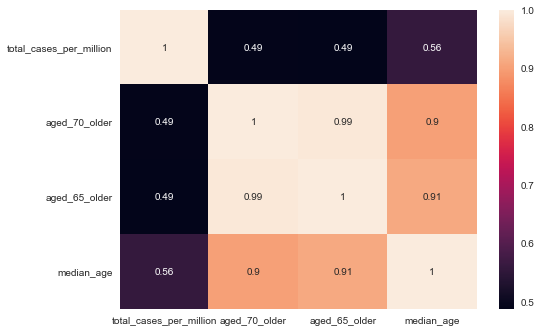

In [48]:
correlation_mat = df_ageGroupData[ageGroupList].corr()
# print(correlation_mat)
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h2>India vs USA GDP comaprision</h2>

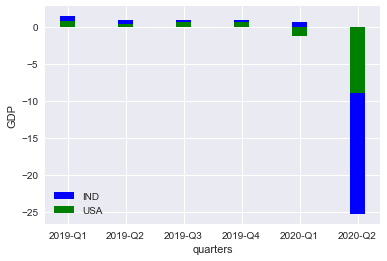

In [169]:
column = ws_economy['A']
countries=['USA','IND']
time=['2019-Q1','2019-Q2','2019-Q3','2019-Q4','2020-Q1','2020-Q2']
values=ws_economy['G']

gdpind=[]
gdpusa=[]
for j in range(1,len(column)):
    if column[j].value=='USA':
        gdpusa.append(values[j].value)
    if column[j].value=='IND':
        gdpind.append(values[j].value)


gdpusa.pop()
data=[gdpind,gdpusa]
fig, ax = plt.subplots() 
ax.bar(time, data[0], color = 'b', width = 0.25)
ax.bar(time, data[1], color = 'g', width = 0.25)
ax.legend(['IND','USA'],loc="lower left")
plt.xlabel('quarters')
plt.ylabel('GDP')
plt.show()


<h2>Interpretation</h2>

<h3>Altitude</h3>

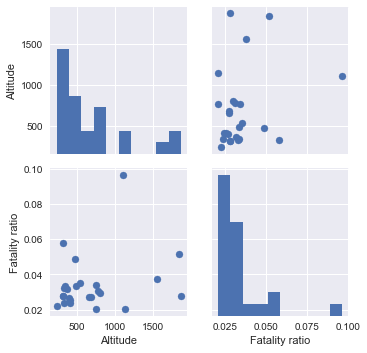

In [171]:
altitudeList = ['Altitude','Fatality ratio']
df_altitude_modif = df_altitude_modif.dropna(subset=altitudeList)
g=sb.PairGrid(data=df_altitude_modif.loc[df_altitude_modif['Fatality ratio'] > 0.02][altitudeList].sample(n=25))
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);

<P>
Hypothesis test:<br>
H0: Cases are independent of altitude of the place<br/>
H1: There is some effect of altitude on cases at that place<br/>
 <p>

In [172]:
# column = ws_altitude['A']  # Column
# columnalt = ws_altitude['D']
# countriesToLookFor = ['India','United States','Italy','Japan']
# data=[]
# countries=[]
# for i in range(len(column)):
#     countries.append(column[i].value)
# for i in countriesToLookFor:
#     x=columnalt[countries.index(i)].value
#     s=''
#     for i in x:
#         if i.isdigit():
#             s=s+i
#         elif i==',':
#             continue
#         else:
#             break
#     data.append(int(s))

# # plt.bar(countriesToLookFor,data)

# fig, ax = plt.subplots()
# y_pos = np.arange(len(df_cases_selected_countries["location"]))
# ax.bar(y_pos,data )
# ax.set_xticks(y_pos)
# ax.set_xticklabels(df_cases_selected_countries["location"])
# ax.invert_xaxis()  # labels read top-to-bottom
# ax.set_ylabel('in meters')
# ax.set_title('Altitude Variations')
# plt.show()

# fig, ax = plt.subplots()
# y_pos = np.arange(len(df_cases_selected_countries["location"]))
# ax.bar(y_pos, df_cases_selected_countries["total_cases"])
# ax.set_xticks(y_pos)
# ax.set_xticklabels(df_cases_selected_countries["location"])
# ax.invert_xaxis()  # labels read top-to-bottom
# ax.set_ylabel('Total cases')
# ax.set_title('Total cases in different countries as of 30th Nov 2020')

<h3> Economy </h3>

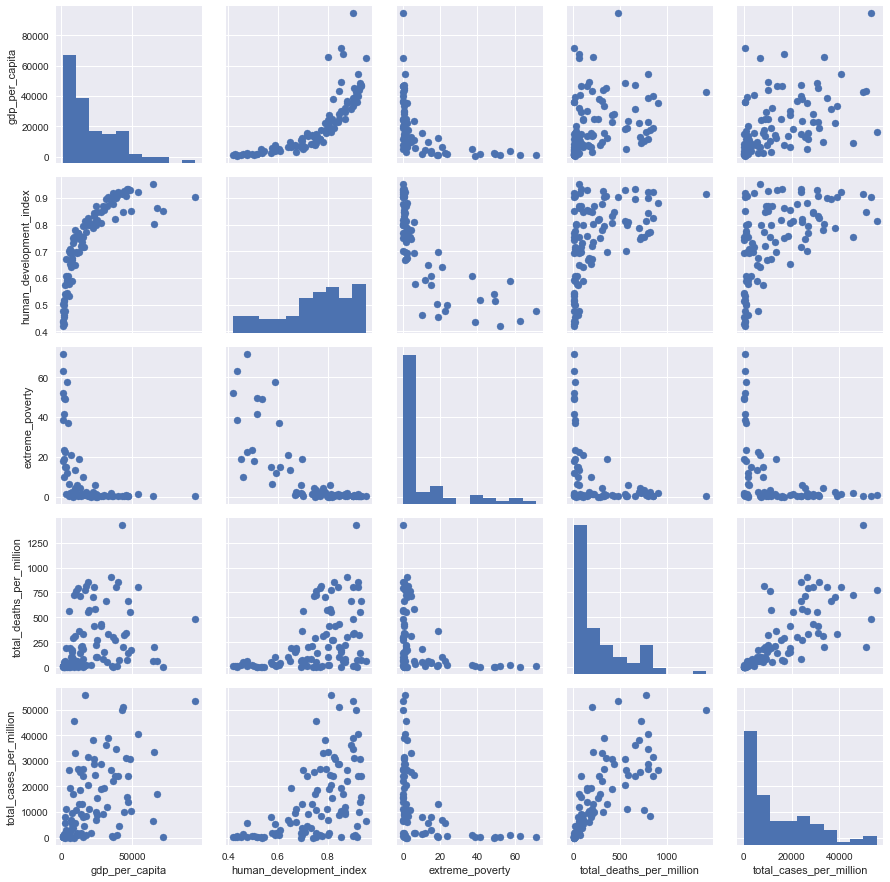

In [173]:
g=sb.PairGrid(data=df_economy.sample(n=100), vars=economy_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


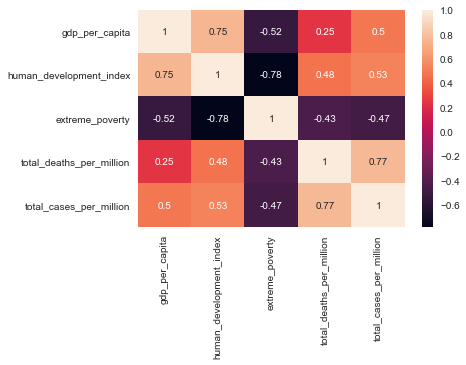

In [174]:
correlation_mat = df_economy[economy_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h3> Hospital Facilities </h3>

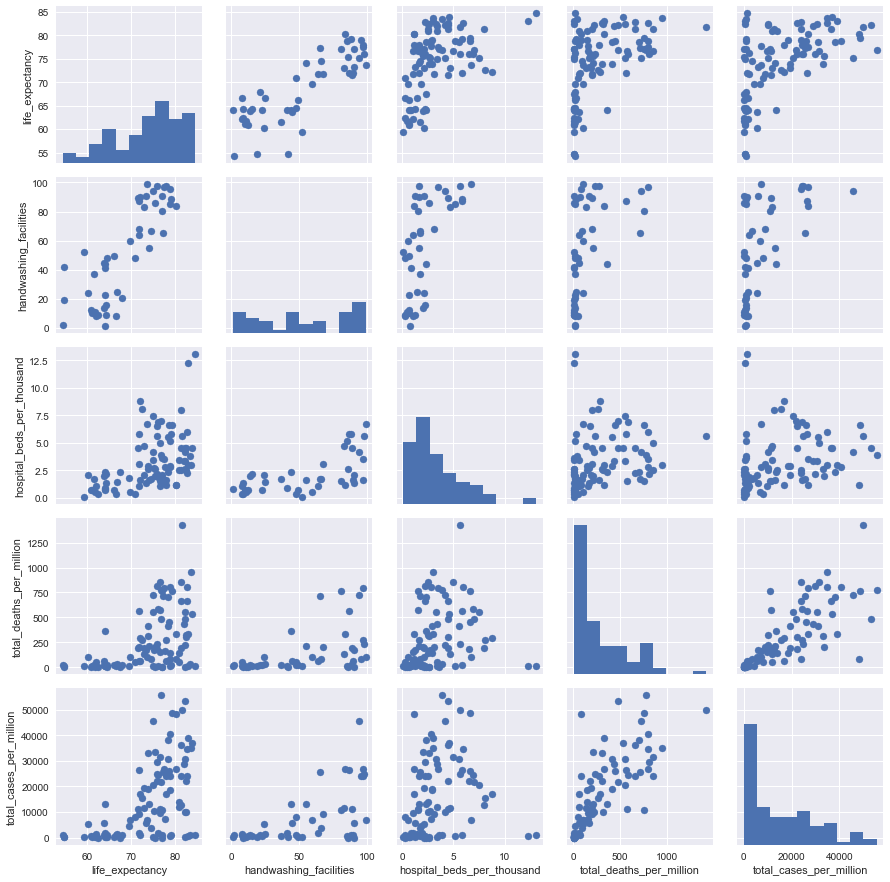

In [175]:

g=sb.PairGrid(data=df_medical.sample(n=100), vars=medical_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


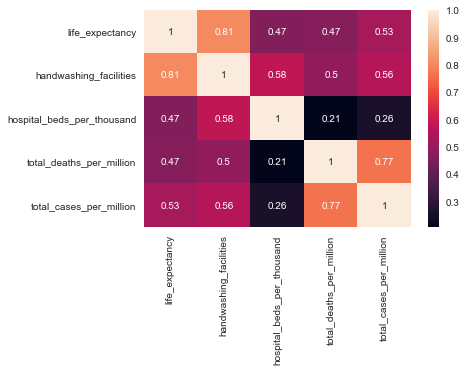

In [176]:
correlation_mat = df_medical[medical_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h3> Indian Economy </h3>

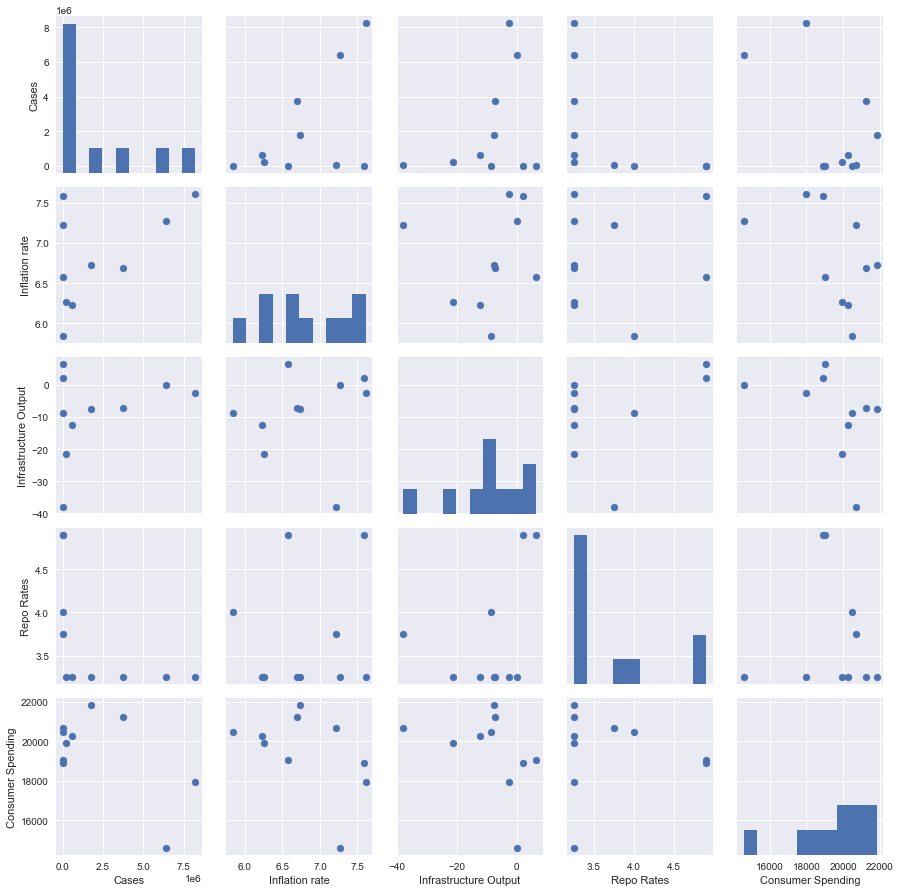

In [190]:
df_covid_monthly = df_covid_data[df_covid_data["date"].str.endswith("01", na=False)]
df_covid_monthly = df_covid_monthly[df_covid_monthly["location"]=="India"]
data = [df_covid_monthly["total_cases"].values.tolist(),
        economyGetter("INFLATION RATE"),
        economyGetter("INDIA INFRASTRUCTURE OUTPUT"),
        economyGetter("REPO RATES"),
        economyGetter("CONSUMER SPENDING"),
       ]
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct"]
cols = ["Cases","Inflation rate","Infrastructure Output","Repo Rates","Consumer Spending"]
df_econInd_modif = pd.DataFrame(data, index = cols, columns = months)
df_econInd_modif = df_econInd_modif.T
g=sb.PairGrid(data=df_econInd_modif)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


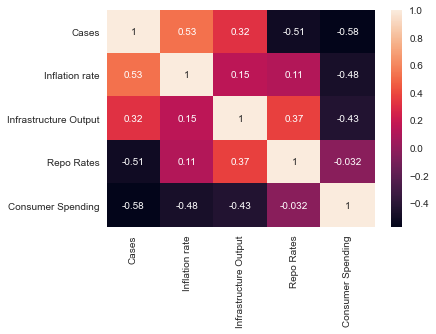

In [191]:
correlation_mat = df_econInd_modif.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h2> Diseases : </h2>

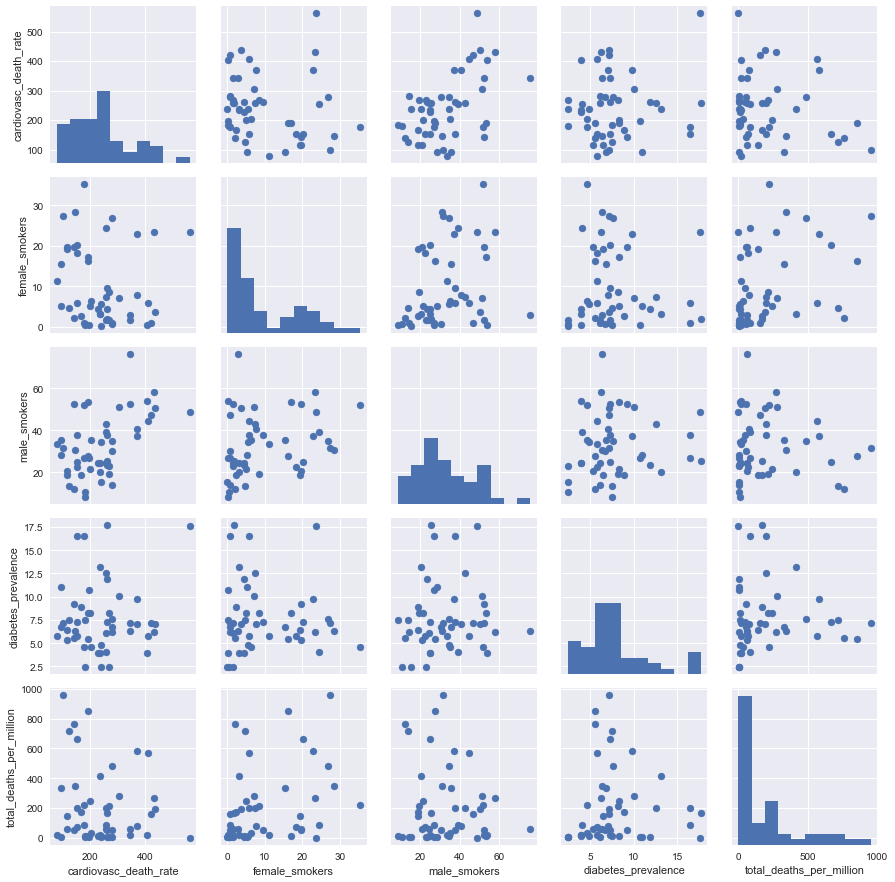

In [160]:
g=sb.PairGrid(data=df_disease.sample(n=50), vars=disease_list)
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist);


<p> Correlation Matrix as a Heat map of the above plot </p>

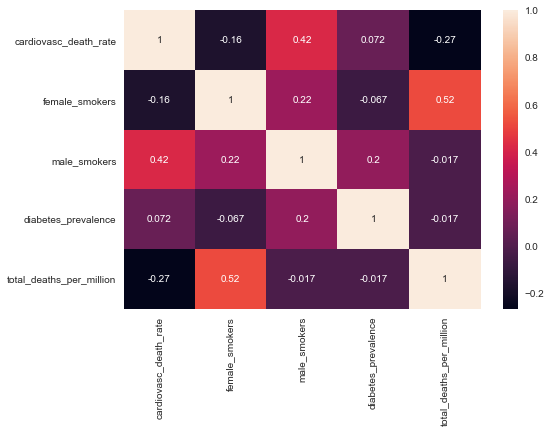

In [50]:
correlation_mat = df_disease[disease_list].corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

<h2> Interpretation Of Data </h2>

In [96]:
df_interpretation_data = df_cases_today.dropna(subset=['aged_70_older', 'female_smokers', 'total_deaths_per_million'])
df_interpretation_data[['aged_70_older', 'female_smokers', 'total_deaths_per_million']].describe()


aged_70_older  female_smokers  total_deaths_per_million
count     133.000000      133.000000                133.000000
mean        6.314150       10.324316                247.088722
std         4.481236       10.282214                297.358834
min         0.526000        0.100000                  0.352000
25%         2.380000        1.900000                 18.502000
50%         5.030000        5.900000                105.982000
75%         9.842000       19.100000                362.122000
max        18.493000       44.000000               1427.744000

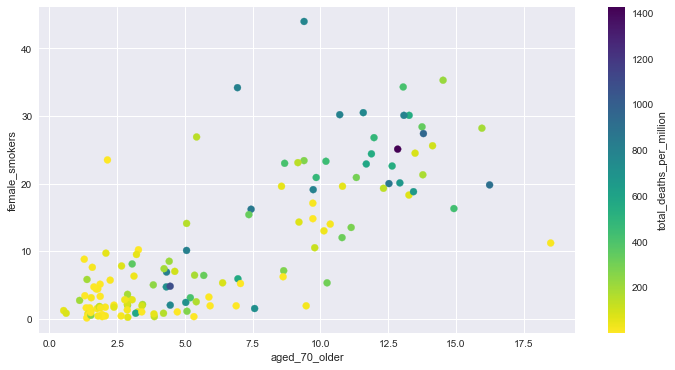

In [98]:
plt.figure(figsize=[12,6])
plt.scatter(data=df_interpretation_data, x='aged_70_older', y='female_smokers', c='total_deaths_per_million', cmap='viridis_r' );
plt.colorbar(label='total_deaths_per_million');
plt.xlabel('aged_70_older');
plt.ylabel('female_smokers');
axes = plt.gca()